# 📊 World Happiness Report — Proyecto Data Science  
### Primera Entrega — Coderhouse

## 1. Abstract:

> La felicidad y el bienestar social se ha convertido en indicadores funcamentales para evaluar el desarrollo de la naciones, complementando las meteicas enconomicas tradicionales como el Producto Interno Bruto (PIB). Este dataset se encuentra como un reporte internacional renocido que recopila datos sobre la percepcion de bienestar en mad de 150 paises, se analiza el impacto de diversos factores socioeconomicos y de calidad de vida sobre le índice de felicidad de los países, con el objetivo de identificar ccuáles varibles explican mejor la diferencias en binestar percibido entre naciones.
El análisis se realiza utilizando técnicas de exploración de datos (EDA) y visualización con Python, mediante el uso de librerías como pandas, matplotlib y seaborn. Se comienza con una descripción del dataset, la detección de valores faltantes y el análisis estadístico inicial. Luego, se formulan preguntas e hipótesis que guían la investigación, tales como si la riqueza (medida por el PIB per cápita) es el principal factor asociado a la felicidad, o si la salud y la libertad personal tienen una influencia mayor. A partir de estas hipótesis, se desarrollan visualizaciones univariadas, bivariadas y multivariadas que permiten observar relaciones entre variables, patrones por región y posibles asociaciones significativas.

Además de las visualizaciones exploratorias, este trabajo sienta las bases para futuras etapas del proyecto final, en las que se incorporarán técnicas de modelado estadístico y de machine learning para intentar predecir el nivel de felicidad a partir de las variables estudiadas. De este modo, la presente entrega funciona como una primera aproximación al problema, centrada en la comprensión del dataset, la formulación de hipótesis y la identificación de patrones relevantes que orienten análisis más avanzados.


# **Descripción del Dataset**
Dataset: World Happiness Report 2021 (o similar año)

Característica Detalle

Fuente: [Kaggle / World Happiness Report](https://www.kaggle.com/datasets/yadiraespinoza/world-happiness-2015-2024)

Formato: CSV
Registros: 150 países
Variables: 9 principales (numéricas y categóricas)
Objetivo: Analizar factores que influyen en el índice de felicidad



## **1.1 Preguntas de interés e hipótesis**

En este proyecto se busca responder la siguiente **pregunta**:

> ¿Qué factores socioeconómicos y de calidad de vida explican mejor el nivel de felicidad de los países?

A partir de esta pregunta general, se plantean las siguientes **preguntas específicas** y sus respectivas **hipótesis**:


---

## Preguntas e hipótesis de interés

### Pregunta 1:
¿Existe relación entre el nivel económico de un país (GDP per capita) y su nivel de felicidad?

**Hipótesis 1 (H1):**
> A mayor PIB per cápita, mayor es el índice de felicidad.

---

### Pregunta 2:
¿Influye la salud (expectativa de vida saludable) en el bienestar de los países?

**Hipótesis 2 (H2):**
> Los países con mayor expectativa de vida saludable tienden a tener mayores niveles de felicidad.

---

### Pregunta 3:
¿La percepción de corrupción afecta negativamente el nivel de felicidad?

**Hipótesis 3 (H3):**
> Cuanto mayor es la percepción de corrupción, menor es el índice de felicidad.

---

### Pregunta 4:
¿Influyen simultáneamente la riqueza, la salud y la región geográfica en el nivel de felicidad?

**Hipótesis 4 (H4):**
> Los países con mayor PIB, mayor salud y pertenecientes a regiones desarrolladas presentan niveles más altos de felicidad.


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Opciones visuales
plt.style.use('default')
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

In [13]:
df = pd.read_csv("/content/world_happiness_combined.csv", sep=';')
display(df.head())

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,Western Europe,"7,58700","8,26132","0,96240",73,"0,99379","0,37289","0,23941",2015
1,2,Iceland,Western Europe,"7,56100","7,70416","1,00000",73,"0,93884","0,54819","0,74371",2015
2,3,Denmark,Western Europe,"7,52700","7,84114","0,97030",70,"0,96962","0,42894","0,12382",2015
3,4,Norway,Western Europe,"7,52200","8,63100","0,94917",71,"1,00000","0,43598","0,33860",2015
4,5,Canada,North America and ANZ,"7,42700","7,84595","0,94322",71,"0,94511","0,57560","0,40285",2015


In [20]:
df.info()

# Resumen estadístico de las variables numéricas
df.describe()

# Valores faltantes por columna
df.isnull().sum()

# Registros duplicados
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       1502 non-null   int64  
 1   Country                       1502 non-null   object 
 2   Regional indicator            1499 non-null   object 
 3   Happiness score               1502 non-null   float64
 4   GDP per capita                1502 non-null   float64
 5   Social support                1502 non-null   object 
 6   Healthy life expectancy       1502 non-null   float64
 7   Freedom to make life choices  1502 non-null   object 
 8   Generosity                    1502 non-null   object 
 9   Perceptions of corruption     1502 non-null   float64
 10  Year                          1502 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 129.2+ KB


np.int64(0)

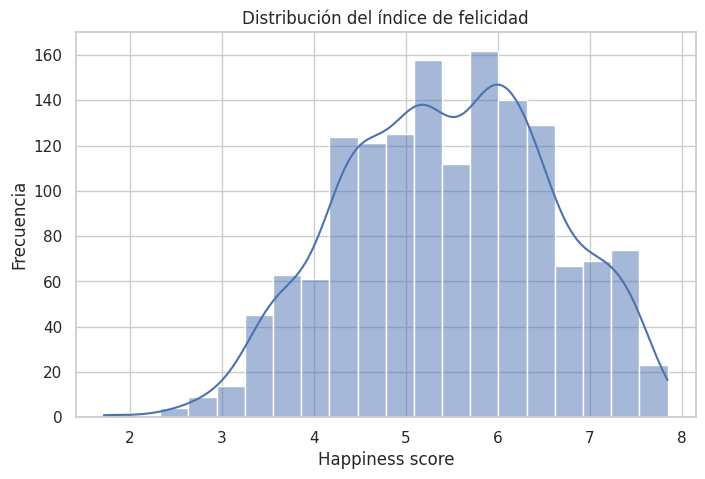

In [15]:
# Convirtiendo 'Happiness score' a valor numerico, remplazando la "," por un "."
df['Happiness score'] = df['Happiness score'].str.replace(',', '.', regex=False).astype(float)

# Histograma del índice de felicidad (Life Ladder o Happiness Score)
plt.figure(figsize=(8,5))
sns.histplot(df['Happiness score'], bins=20, kde=True)
plt.title('Distribución del índice de felicidad')
plt.xlabel('Happiness score')
plt.ylabel('Frecuencia')
plt.show()

El histograma muestra cómo se distribuye el índice de felicidad entre los países.  
Se observa que la mayoría de los valores se concentran en un rango medio (aprox. entre 4 y 7 puntos), mientras que hay pocos países con niveles muy bajos o muy altos de felicidad. Esto sugiere que la felicidad tiende a agruparse en valores intermedios, sin extremos demasiado marcados.


Hipótesis 1:



> A mayor PIB per cápita, mayor será el índice de felicidad de un país.



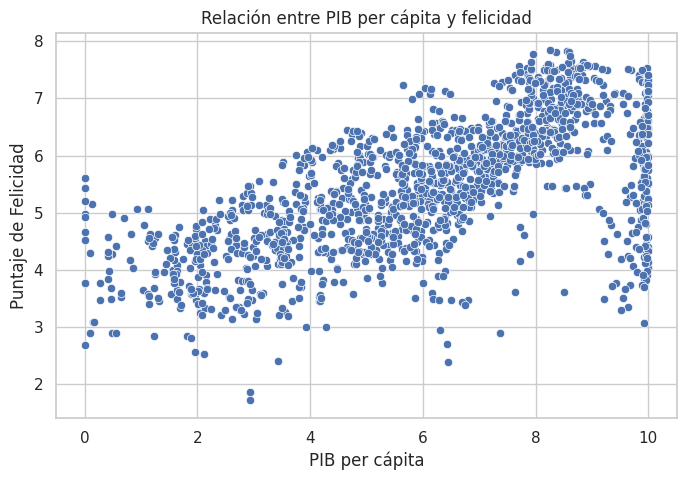

In [16]:
df['GDP per capita'] = df['GDP per capita'].astype(str).str.replace(',', '.', regex=False).astype(float)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='GDP per capita', y='Happiness score')
plt.title('Relación entre PIB per cápita y felicidad')
plt.xlabel('PIB per cápita')
plt.ylabel('Puntaje de Felicidad')
plt.show()

Este gráfico analiza si la riqueza económica de un país, expresada mediante el **PIB per cápita (GDP per capita)**, está relacionada con su nivel de felicidad (**Happiness score**). Cada punto representa un país del dataset.

En el gráfico se observa una **tendencia positiva clara**: a medida que aumenta el PIB per cápita, también aumentan los niveles de felicidad. Es decir, los países más ricos económicamente tienden a ser más felices. Los puntos se distribuyen formando un patrón ascendente, lo que visualmente sugiere una **correlación positiva** entre ambas variables.

✔ Esto confirma parcialmente la Hipótesis 1 (H1):


> El gráfico respalda la hipótesis inicial. La riqueza económica es un factor relevante y está asociada con mayores niveles de felicidad, aunque no la explica completamente, lo que justifica analizar otros factores como la salud, la libertad o la percepción de corrupción.







Hipótesis 2:



> La variable "libertad para tomar decisiones" tiene una correlación más fuerte con la felicidad que el apoyo social.



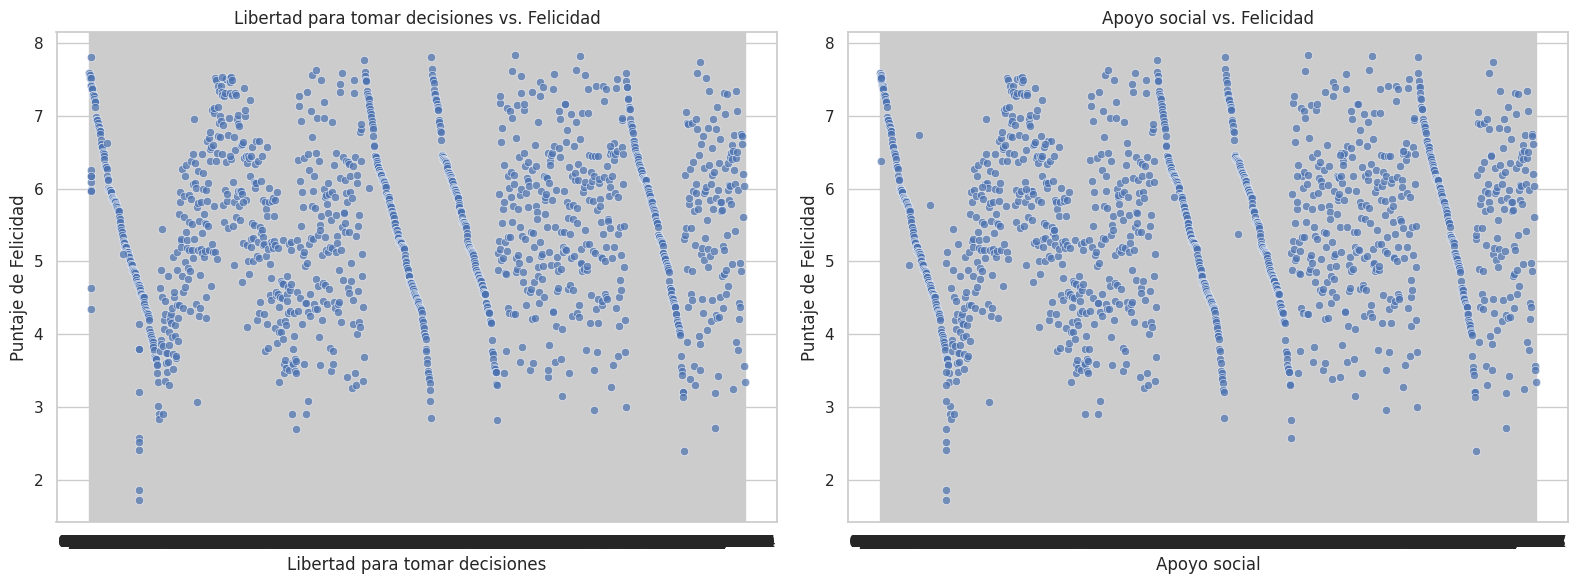

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.scatterplot(data=df, x='Freedom to make life choices', y='Happiness score', ax=axes[0], alpha=0.7)
axes[0].set_title('Libertad para tomar decisiones vs. Felicidad')
axes[0].set_xlabel('Libertad para tomar decisiones')
axes[0].set_ylabel('Puntaje de Felicidad')
#axes[0].tick_params(axis='x', rotation=90)


sns.scatterplot(data=df, x='Social support', y='Happiness score', ax=axes[1], alpha=0.7)
axes[1].set_title('Apoyo social vs. Felicidad')
axes[1].set_xlabel('Apoyo social')
axes[1].set_ylabel('Puntaje de Felicidad')
#axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

El gráfico de dispersión de la izquierda muestra la relación entre la **Libertad para tomar decisiones** y el **Puntaje de Felicidad**. El gráfico de la derecha muestra la relación entre el **Apoyo Social** y el **Puntaje de Felicidad**.

✕ Esto niega la **Hipótesis 2 (H2):**


> Estos datos sugieren que la hipótesis **no se cumple**. De hecho, el apoyo social tiene una correlación más fuerte con el puntaje de felicidad que la libertad para tomar decisiones. Visualmente, el gráfico de apoyo social también muestra una tendencia más clara y menos dispersa que el de libertad.



Hipótesis 3:

> Cuanto mayor es la percepción de corrupción, menor es el índice de felicidad.



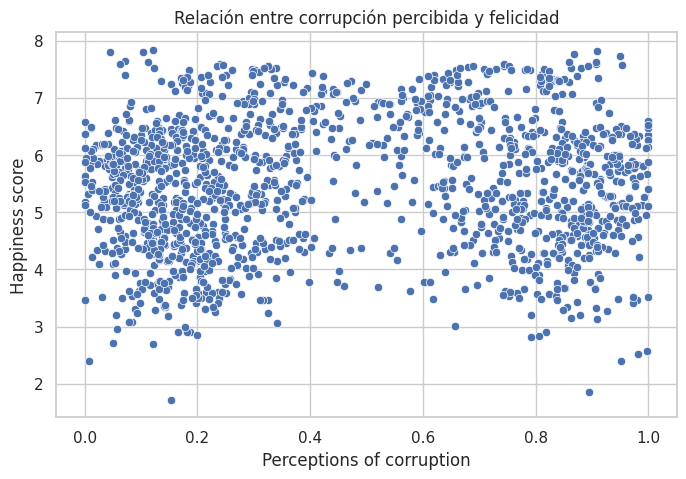

In [18]:
# Convertir la columna a tipo numérico
df['Perceptions of corruption'] = df['Perceptions of corruption'].astype(str).str.replace(',', '.', regex=False).astype(float)

# Gráfico de dispersión
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Perceptions of corruption', y='Happiness score')
plt.title('Relación entre corrupción percibida y felicidad')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness score')
plt.show()


Aunque no todos los puntos siguen perfectamente la tendencia, el patrón general sugiere una relación inversa entre corrupción y bienestar. La corrupción afecta negativamente la confianza en las instituciones, la seguridad y la calidad de vida, lo que podría explicar por qué reduce los niveles de felicidad en la población.

✔ Esto confirma la **Hipótesis 3 (H3):**


> La corrupción percibida tiene un **impacto negativo** en la felicidad, consolidándose como un factor importante a considerar en el bienestar social.



**Hipótesis 4 (H4):**
> Los países con mayor PIB, mayor salud y pertenecientes a regiones desarrolladas presentan niveles más altos de felicidad.

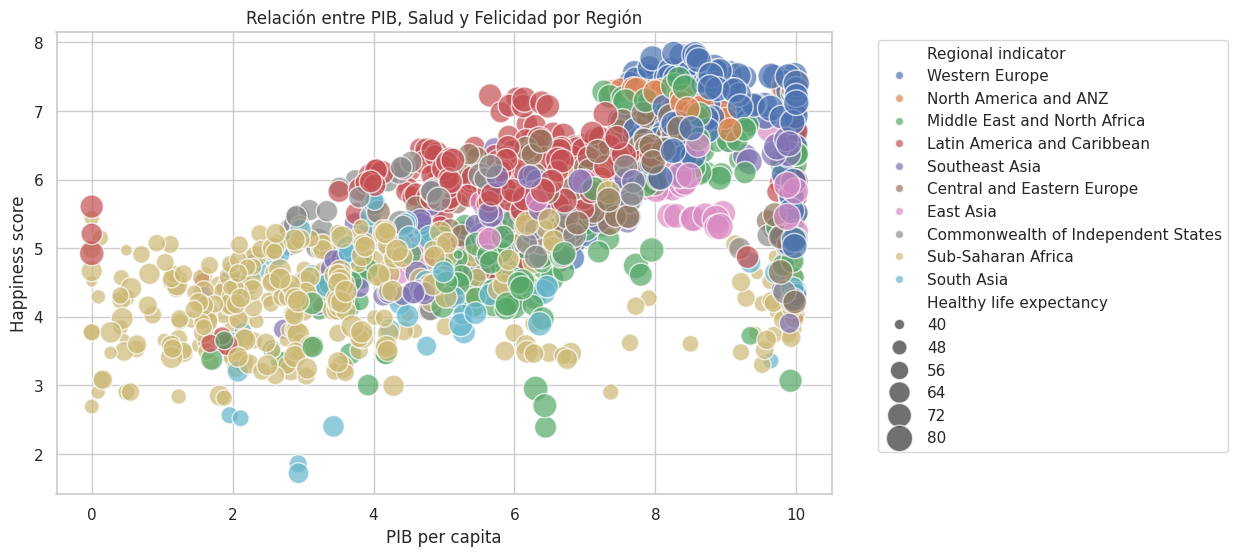

In [19]:
# Convertir la columna 'Healthy life expectancy' a tipo numérico de forma robusta
df['Healthy life expectancy'] = df['Healthy life expectancy'].astype(str).str.replace(',', '.', regex=False).astype(float)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='GDP per capita',
    y='Happiness score',
    hue='Regional indicator',            # Región (color)
    size='Healthy life expectancy',      # Salud (tamaño)
    sizes=(50, 400),
    alpha=0.7
)
plt.title('Relación entre PIB, Salud y Felicidad por Región')
plt.xlabel('PIB per capita')
plt.ylabel('Happiness score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Este gráfico permite analizar tres factores al mismo tiempo:
- **Eje X (horizontal):** riqueza del país (GDP per capita),
- **Eje Y (vertical):** nivel de felicidad (Happiness score),
- **Tamaño del punto:** salud (Healthy life expectancy),
- **Color:** región geográfica (Regional indicator).

Se observa que los países con **mayor PIB** y **mayor salud** (puntos grandes en la parte superior derecha) tienden a mostrar **mayores niveles de felicidad**.  
Además, estos países pertenecen mayormente a regiones como **Europa Occidental y Norteamérica**, lo que indica diferencias regionales.

✔ Esto confirma la **Hipótesis 4 (H4):**  
> Los países más ricos y saludables, especialmente los pertenecientes a regiones desarrolladas, presentan mayores niveles de felicidad.
